# Predicting customer churn

### Decision tree modelling

### Use a tree-base model which is a decision tree to predict customer churn(the percentage of customers that stopped using a companys product or service during a certain time frame) 

In [1]:
#importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree

### Reading in the dataset using pandas.

In [2]:
dt = pd.read_csv('Telco-Customer-Churn.csv')
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dt.shape

(7043, 21)

In [4]:
print(dt['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


### Printing out the summary of the dataframe. We can see that we have 7043 entries and have 21 columns.                We notice that total charges column is an object instead of integer so we going to start cleaning our data.

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#We change total charges column to numeric and checking for any null values
dt.TotalCharges = pd.to_numeric(dt.TotalCharges, errors='coerce')
dt.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Instead of dropping the null values we replaced them with mean average
dt["TotalCharges"].replace(np.nan,dt['TotalCharges'].mean()).shape

(7043,)

### We take our target which is 'Churn' that we want to predict and plot it to see the distribution, we are dealing with an imbalanced problem as there are many more non-churned as churned users. This may cause the model to have high accuracy in predicting customers who did not churn.

Text(0.5, 1.0, 'churned')

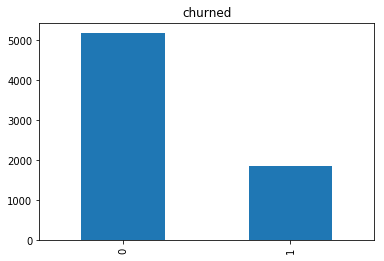

In [8]:
#Dropping the customer ID 
dt = dt.drop(['customerID'], axis=1)

target = 'Churn'
dt[target].replace(to_replace='Yes', value=1, inplace=True)
dt[target].replace(to_replace='No',  value=0, inplace=True)

dt[target].value_counts().plot('bar').set_title('churned')

In [9]:
#Split features into two lists so we can feature analyse
categorical_features = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'
]
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

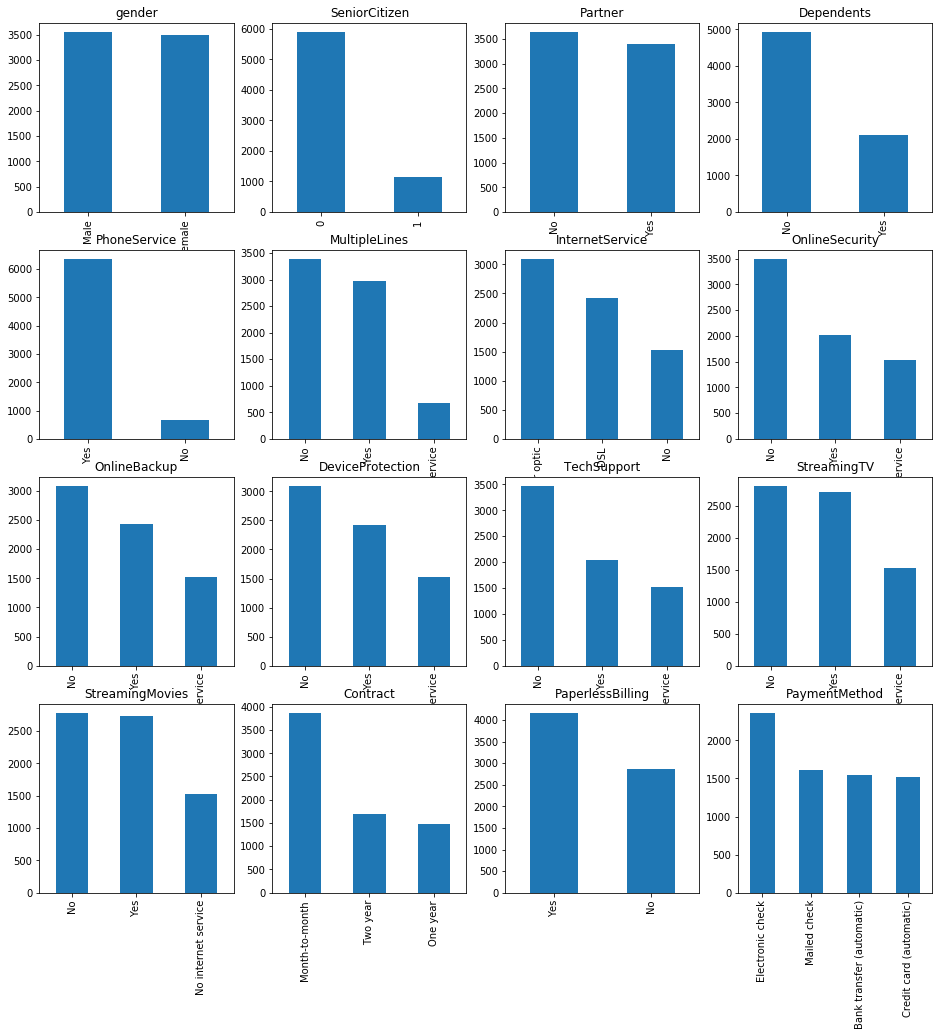

In [11]:
#Analyze categorical features, we use bar charts.
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(16, 16))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    dt[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)


### The graphs above show us how the categorical data is distributed, the phone service and senior citizen is unfairly represented and with that the results are going to cater or be based on more senior people and people with phone service. With the distribution we can take out the features that we think influence the target value.

#### 'gender' - interesting to know if gender plays a role relative to the target
#### 'Partner' -  do they have a partner that wants them to leave maybe?
#### 'Dependents' - does the persons responsibility prevent them from continueing with the contract?
#### 'Multiple lines' - if they have more than one line
#### 'internet service' - is the service satisfying, that can play a role
#### 'OnlineService' and 'OnlineBackup' - not a lot of people care about these things, not really influencial
#### 'Deviceprotection' and 'Techsupport' - if the customers has opted for these services
#### 'StreamingTV' and 'StreamingMovies' - if the package involves these services
#### 'Contract' - customer has long or short term agreement
#### 'Paperlessbilling' - when you receive an electronic version of your bill instead of a paper bill
#### 'Paymentmethod' - method used to pay the bill

### Get basic descriptive statistics for the data and check for missing and incorrect or extreme values. Get scatterplots or heatmaps showing the relationship between the variables

#### Is there any correlation

In [12]:
cols = ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod','tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

for col in cols:
    dt[col] = pd.get_dummies(dt[col])

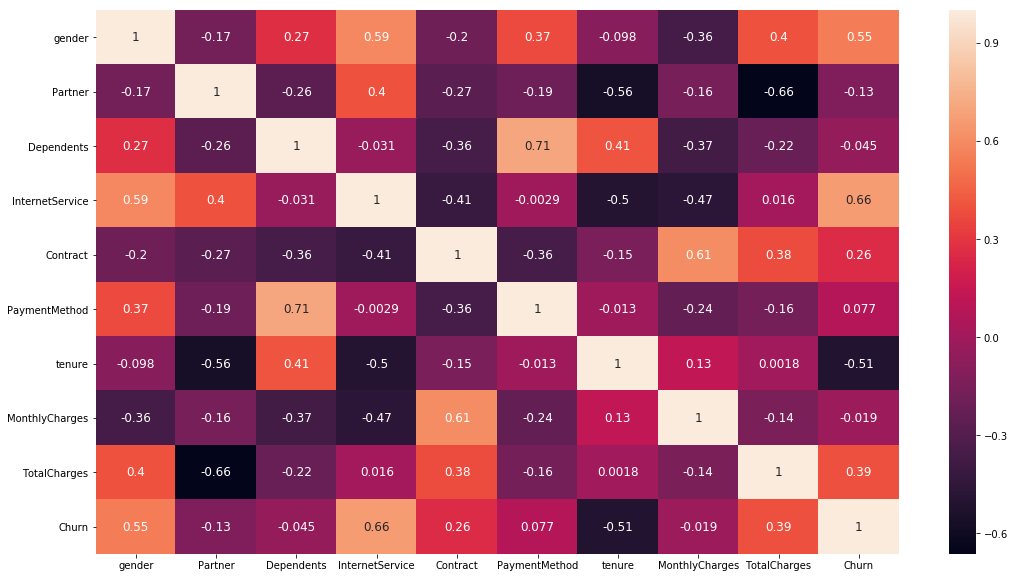

In [13]:
plt.figure(figsize=(18,10))
cols = ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod','tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
df = pd.DataFrame(abs(np.random.randn(9, 10)), columns= cols)

sns.heatmap(df.corr(), annot=True, annot_kws={'size':12})

#### Gender and Partner are having a positive relationship with totalcharges, you can find that charges for females are lower than males and that people with partners get lower charges or higher charges than people with no patners. We also see that gender and partner also have a strong positive relationship with each other.

#### When we look at our target we see that there is a lot of negetive relationship between a lot of features. 

In [14]:
df.describe()

,gender,Partner,Dependents,InternetService,Contract,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.312305,0.634964,0.517985,0.893843,0.634583,0.657407,0.574777,0.672503,0.885952,0.776136
std,0.657184,0.480404,0.535274,0.609793,0.440202,0.370698,0.279972,0.710127,0.887174,0.489108
min,0.270229,0.025670,0.037132,0.122164,0.141394,0.139535,0.219599,0.114799,0.048669,0.108654
25%,0.772861,0.343263,0.128730,0.236732,0.287037,0.298351,0.420537,0.190864,0.270723,0.278443
50%,1.161312,0.480041,0.305152,0.840505,0.537672,0.713559,0.536914,0.357894,0.637527,0.940180
75%,1.933415,0.775149,0.703019,1.457998,0.933996,0.792698,0.749744,0.747552,1.158713,1.001011
max,2.103403,1.414538,1.715174,1.617330,1.400930,1.227411,1.023057,2.089182,2.921359,1.492440


### In our dataset we mostly have categorical data and as we are dealing with a target value that is continuous(numbers) we needed to change the categorical data into encoded data so we can work with it in numerical aspect.

In [15]:
#Use the pandas function get_dummies to change the categorical data into 0s and 1s
cols = dt.columns
for col in cols:
    dt[col] = pd.get_dummies(dt[col])
    
dt.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,0
1,1,1,0,0,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,0
2,1,1,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,1
3,1,1,0,0,1,1,0,0,0,1,0,0,1,1,1,1,0,1,1,0
4,0,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1


In [16]:
dt.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.837853,0.483033,0.299588,0.998438,0.096834,0.481329,0.656254,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.449808,0.407781,0.780775,0.999858,0.999858,0.265370
std,0.500013,0.368612,0.499748,0.458110,0.039492,0.295752,0.499687,0.474991,0.500024,0.496232,0.496355,0.499988,0.489723,0.488977,0.497510,0.491457,0.413751,0.011916,0.011916,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split your data into train and test sets.

In [17]:
x = dt.drop(['Churn'], axis=1)
y = dt['Churn']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(4930, 19) (4930,)
(2113, 19) (2113,)


In [18]:
#train the model on the training data
telco_model = tree.DecisionTreeClassifier()
telco_model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Report the accuracy of your model on the training set and on the test set. How successful is the model - what is its sensitivity and specificity?

In [19]:
y_pred = telco_model.predict(train_x)

print('Accuracy is: ', metrics.accuracy_score(train_y, y_pred)*100)

results = metrics.confusion_matrix(train_y, y_pred) 
print('Confusion Matrix :')
print(results) 

print('Report : ')
print(metrics.classification_report(train_y, y_pred)) 


Accuracy is:  89.73630831643003
Confusion Matrix :
[[3472  142]
 [ 364  952]]
Report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3614
           1       0.87      0.72      0.79      1316

   micro avg       0.90      0.90      0.90      4930
   macro avg       0.89      0.84      0.86      4930
weighted avg       0.90      0.90      0.89      4930



In [20]:
y_pred = telco_model.predict(test_x)

print('Accuracy is: ', metrics.accuracy_score(test_y, y_pred)*100)

results = metrics.confusion_matrix(test_y, y_pred) 

print('Confusion Matrix :')
print(results) 

print('Report : ')
print(metrics.classification_report(test_y, y_pred)) 


Accuracy is:  71.79365830572647
Confusion Matrix :
[[1305  255]
 [ 341  212]]
Report : 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1560
           1       0.45      0.38      0.42       553

   micro avg       0.72      0.72      0.72      2113
   macro avg       0.62      0.61      0.61      2113
weighted avg       0.70      0.72      0.71      2113



### Use a logistic regression model to predict customer churn

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x, train_y)

/home/tsholofelo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Report the accuracy of your model on the training set and on the test set. How successful is the model - what is its sensitivity and specificity?

In [23]:
y_pred = logreg.predict(train_x)

print('Accuracy is: ', metrics.accuracy_score(train_y, y_pred)*100)

results = metrics.confusion_matrix(train_y, y_pred) 
print('Confusion Matrix :')
print(results) 

print('Report : ')
print(metrics.classification_report(train_y, y_pred)) 


Accuracy is:  78.92494929006085
Confusion Matrix :
[[3190  424]
 [ 615  701]]
Report : 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3614
           1       0.62      0.53      0.57      1316

   micro avg       0.79      0.79      0.79      4930
   macro avg       0.73      0.71      0.72      4930
weighted avg       0.78      0.79      0.78      4930



In [24]:
y_pred = logreg.predict(test_x)

print('Accuracy is: ', metrics.accuracy_score(test_y, y_pred)*100)

results = metrics.confusion_matrix(test_y, y_pred) 

print('Confusion Matrix :')
print(results) 

print('Report : ')
print(metrics.classification_report(test_y, y_pred)) 


Accuracy is:  77.80407004259347
Confusion Matrix :
[[1382  178]
 [ 291  262]]
Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.85      1560
           1       0.60      0.47      0.53       553

   micro avg       0.78      0.78      0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113

